In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from learning_algorithm.algo.neuron import AdaptiveLinearBatchGradientDescent
from learning_algorithm.viz.plot import plot_decision_regions

In [2]:
flowers = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                      header=None)

In [3]:
# select setosa and versicolor
y = flowers.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

In [4]:
# extract sepal length and petal length
x = flowers.iloc[0:100, [0, 2]].values

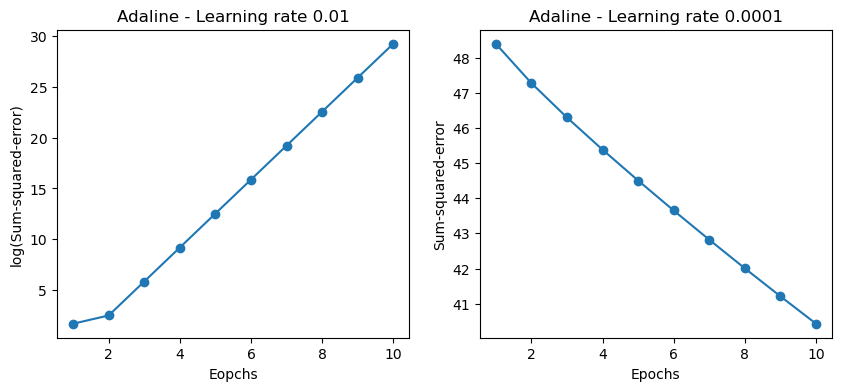

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdaptiveLinearBatchGradientDescent(eta=.01, n_iter=10).fit(x, y)
ax[0].plot(range(1, len(ada1.cost_) + 1),
           np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Eopchs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdaptiveLinearBatchGradientDescent(eta=.0001, n_iter=10).fit(x, y)
ax[1].plot(range(1, len(ada2.cost_) + 1),
           ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show() # This is not needed as the plot shows anyway

In [7]:
# Use standardization feature scaling to give data a normalized distribution
x_std = np.copy(x)
x_std[:,0] = (x[:,0] - x[:,0].mean()) / x[:,0].std()
x_std[:,1] = (x[:,1] - x[:,1].mean()) / x[:,1].std()

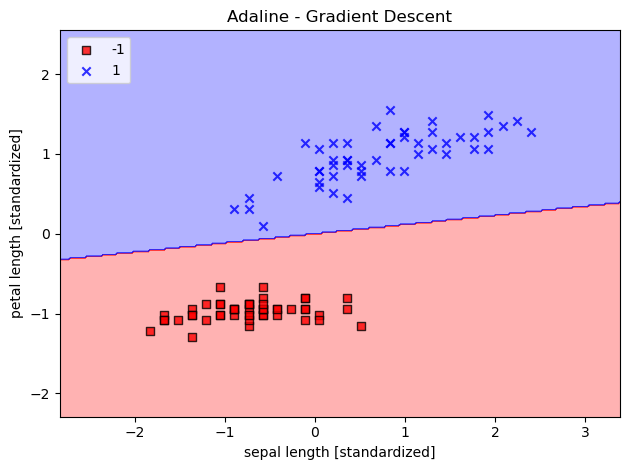

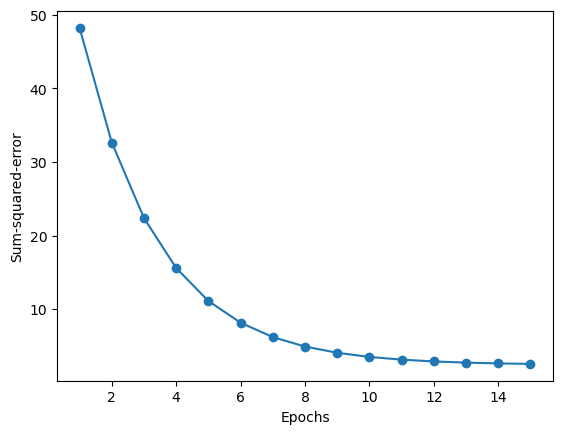

In [22]:
ada3 = AdaptiveLinearBatchGradientDescent(eta=.01, n_iter=15).fit(x_std, y)
plot_decision_regions(x_std, y, classifier=ada3)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada3.cost_) + 1), ada3.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()